In [220]:
#!pip install dataprep

In [221]:
#!pip install pyod

In [97]:
# Load Pakages Mathematical and DATA Operations
import pandas as pd 
import numpy as np 

# Load Pakages plotting
from dataprep.eda import create_report, plot, plot_correlation, plot_missing , plot_diff
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing STYLE to set the Style
from matplotlib import style

# Load Pakages for Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
sns.set()

# Load Pakages for Outlier Detection
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.lof import LOF
from pyod.models.pca import PCA
from pyod.models.knn import KNN

# Load Pakages for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load Pakages Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Load Pakages for oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Load Pakages for Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load Pakage COLUMNTRANSFORMER to apply transformers to columns of an array. 
from sklearn.compose import ColumnTransformer

# Load Pakages for Data Partetions
from sklearn.model_selection import train_test_split

# Load Pakages for Feature Extraction
from sklearn.decomposition import PCA

# Load Pakages for Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Load Pakages for Evaluation
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.model_selection import GridSearchCV

#Load Pakages for Saving and Loading built model
import joblib

In [98]:
Data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [99]:
attrition = Data.copy() 

In [100]:
# Leave(Yes) = 1
# Stay(NO) = 0

In [101]:
attrition['Attrition'].replace({'Yes':1,'No':0},inplace = True)

In [102]:
# Dataset Top 5 Records:
pd.set_option('display.max.columns',500)
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [103]:
# Dataset Last 5 Records:
attrition.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [104]:
# Dataset Random 5 Records:
attrition.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
100,37,1,Travel_Rarely,807,Human Resources,6,4,Human Resources,1,133,3,Male,63,3,1,Human Resources,1,Divorced,2073,23648,4,Y,Yes,22,4,4,80,0,7,3,3,3,2,0,2
1387,29,0,Travel_Rarely,136,Research & Development,1,3,Life Sciences,1,1954,1,Male,89,3,2,Healthcare Representative,1,Married,5373,6225,0,Y,No,12,3,1,80,1,6,5,2,5,3,0,2
1328,27,0,Travel_Rarely,728,Sales,23,1,Medical,1,1864,2,Female,36,2,2,Sales Representative,3,Married,3540,7018,1,Y,No,21,4,4,80,1,9,5,3,9,8,5,8
116,34,0,Travel_Rarely,1354,Research & Development,5,3,Medical,1,153,3,Female,45,2,3,Manager,1,Single,11631,5615,2,Y,No,12,3,4,80,0,14,6,3,11,10,5,8
936,45,0,Travel_Frequently,364,Research & Development,25,3,Medical,1,1306,2,Female,83,3,5,Manager,2,Single,18061,13035,3,Y,No,22,4,3,80,0,22,4,3,0,0,0,0


In [105]:
attrition = attrition.drop(['StandardHours','Over18','EmployeeCount'], axis = 1)

In [106]:
def Dataset_information(Dataset):

  print('Shape of the Dataset: ')
  print()
  print(f'   -> No. of Rows: {Dataset.shape[0]} \n   -> No. of Columns: {Dataset.shape[1]}')
  print()
  print('#'*100)

  print('Dataset Describe: ')
  print()
  print(Dataset.info())
  print()
  print('#'*100)

  print('Data Type: ')
  print()
  Numerical_Features = [i for i in Dataset.dtypes[Dataset.dtypes != 'object'].index]
  Categorical_Features = [i for i in Dataset.dtypes[Dataset.dtypes == 'object'].index]
  print(f'   -> Numerical Features: {Numerical_Features} \n   -> Categorical Features: {Categorical_Features}')
  print()
  print(f'   -> No. of Numerical Features: {len(Numerical_Features)} \n   -> No. of Categorical Features: {len(Categorical_Features)}')
  print()  
  print('#'*100)

In [107]:
Dataset_information(attrition)

Shape of the Dataset: 

   -> No. of Rows: 1470 
   -> No. of Columns: 32

####################################################################################################
Dataset Describe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   ob

In [108]:
# Statistical Summary
attrition.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470.0,NaN,NaN,NaN,0.161224,0.367863,0.0,0.0,0.0,0.0,1.0
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,NaN,NaN,NaN,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0


In [109]:
def Dataset_Values_checker(Dataset):
  print('check unique values: ')
  print()
  for i in Dataset.columns:
    print('*************************************',i,'*************************************')
    print(Dataset[i].unique())
    print()

In [110]:
Dataset_Values_checker(attrition)

check unique values: 

************************************* Age *************************************
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

************************************* Attrition *************************************
[1 0]

************************************* BusinessTravel *************************************
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

************************************* DailyRate *************************************
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432 

In [111]:
# Checking for unique values in every column
attrition.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSince

In [112]:
#Checking the null values 
attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [113]:
# Listing the type of all columns 
attrition.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [114]:
# no. of Labels of Categorical Variable
Categorical_Features = [i for i in attrition.dtypes[attrition.dtypes == 'object'].index]
for i in Categorical_Features:
  print(f'***********{i}*********** \n{attrition[i].value_counts()}')

***********BusinessTravel*********** 
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
***********Department*********** 
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
***********EducationField*********** 
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
***********Gender*********** 
Male      882
Female    588
Name: Gender, dtype: int64
***********JobRole*********** 
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
***********MaritalStatus*********** 

In [115]:
# checking Duplicated values
Before_shape = attrition.shape
Duplicate = attrition.duplicated().sum()
data = attrition.drop_duplicates()
after_shape = attrition.shape
print(f'Orginal Shape: {Before_shape} \nNo. of Duplicates: {Duplicate}\nAfter Droping Duplicate: {after_shape}')

Orginal Shape: (1470, 32) 
No. of Duplicates: 0
After Droping Duplicate: (1470, 32)


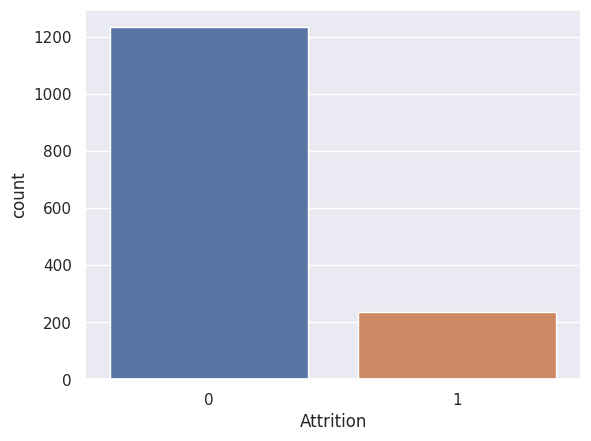

In [222]:
# check distribution for target variable
sns.countplot(x = 'Attrition', data = attrition);

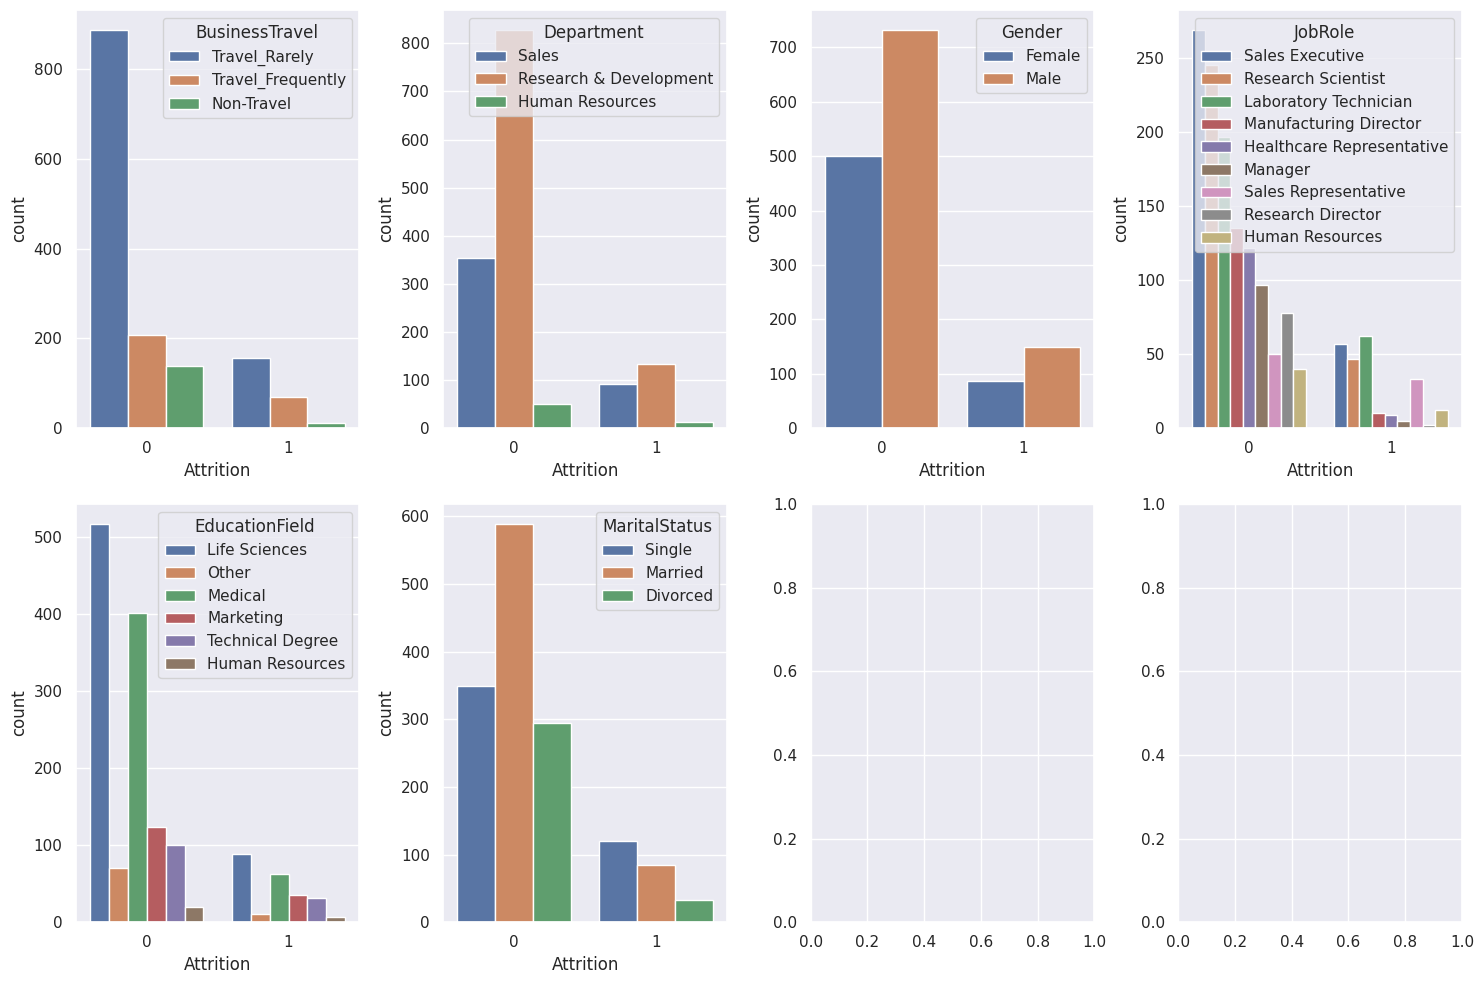

In [223]:
# visualization for non numerical features
fig,axss = plt.subplots(2,4, figsize=[15,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=attrition, ax=axss[0][0])
sns.countplot(x='Attrition', hue='Department', data=attrition, ax=axss[0][1])
sns.countplot(x='Attrition', hue='Gender', data=attrition, ax=axss[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=attrition, ax=axss[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=attrition, ax=axss[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=attrition, ax=axss[1][1])
plt.tight_layout()
plt.savefig('cate_dist.png');

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

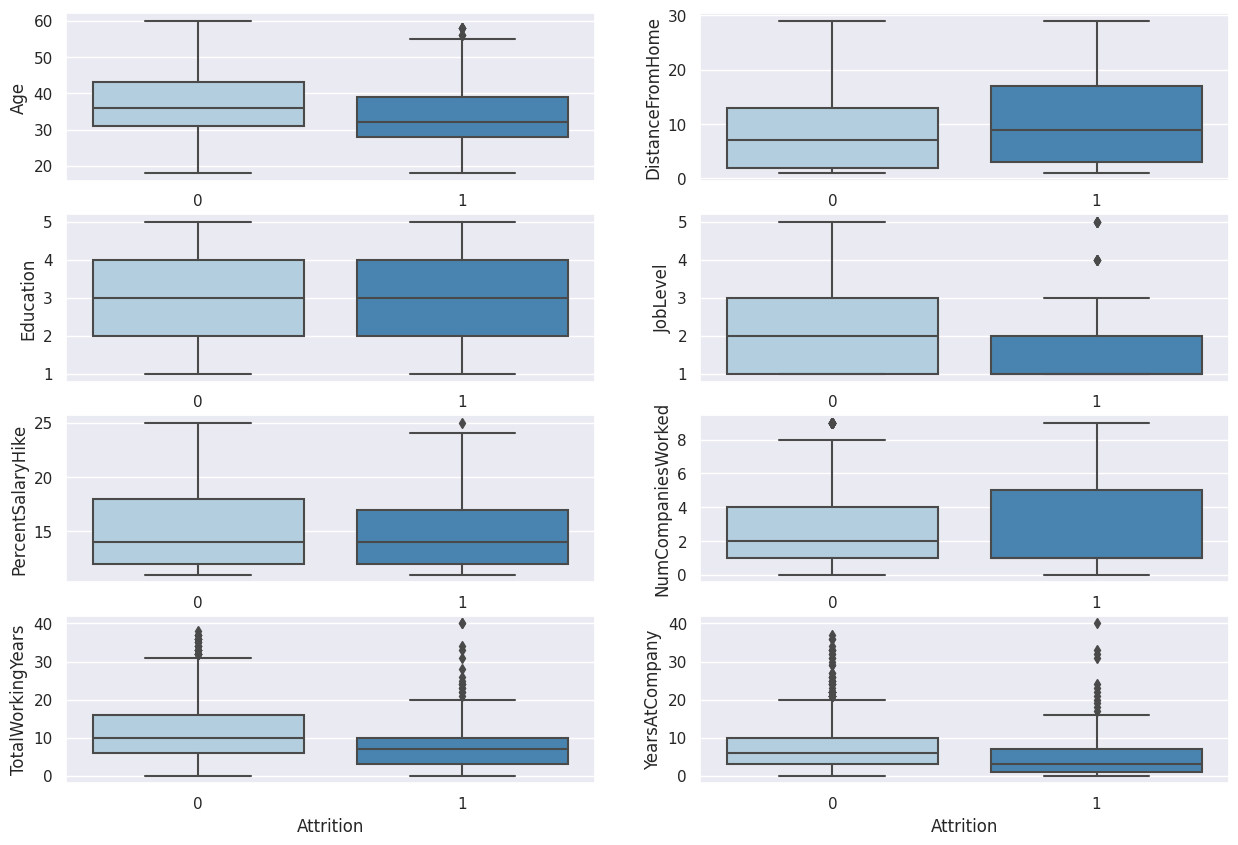

In [116]:
fig, axss = plt.subplots(4,2, figsize=[15,10])
sns.boxplot(x='Attrition', y ='Age', data=attrition, ax=axss[0][0],palette="Blues")
sns.boxplot(x='Attrition', y ='DistanceFromHome', data=attrition, ax=axss[0][1],palette="Blues")
sns.boxplot(x='Attrition', y ='Education', data=attrition, ax=axss[1][0],palette="Blues")
sns.boxplot(x='Attrition', y ='JobLevel', data=attrition, ax=axss[1][1],palette="Blues")
sns.boxplot(x='Attrition', y ='PercentSalaryHike', data=attrition, ax=axss[2][0],palette="Blues")
sns.boxplot(x='Attrition', y ='NumCompaniesWorked', data=attrition, ax=axss[2][1],palette="Blues")
sns.boxplot(x='Attrition', y ='TotalWorkingYears', data=attrition, ax=axss[3][0],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsAtCompany', data=attrition, ax=axss[3][1],palette="Blues")


<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

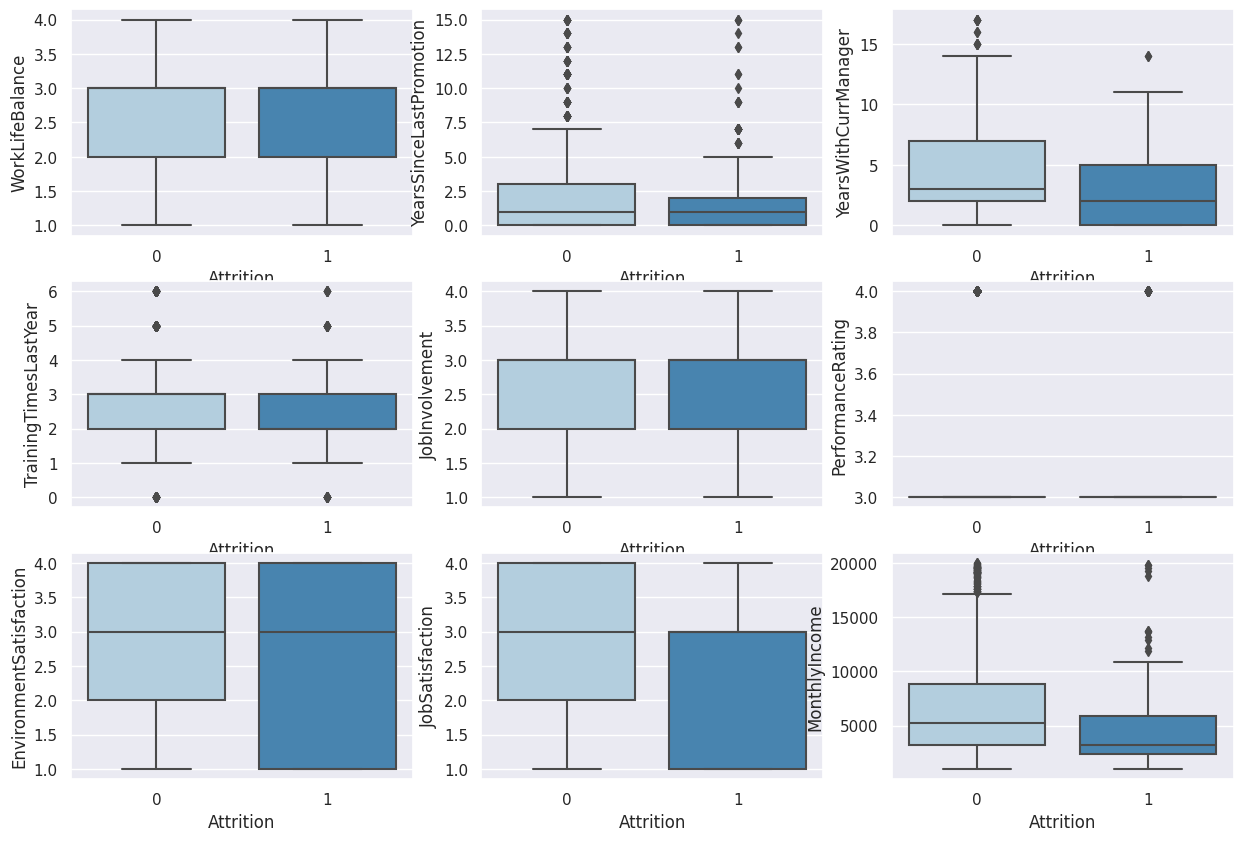

In [117]:
fig, axss = plt.subplots(3,3, figsize=[15,10])
sns.boxplot(x='Attrition', y ='WorkLifeBalance', data=attrition, ax=axss[0][0],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsSinceLastPromotion', data=attrition, ax=axss[0][1],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsWithCurrManager', data=attrition, ax=axss[0][2],palette="Blues")
sns.boxplot(x='Attrition', y ='TrainingTimesLastYear', data=attrition, ax=axss[1][0],palette="Blues")
sns.boxplot(x='Attrition', y ='JobInvolvement', data=attrition, ax=axss[1][1],palette="Blues")
sns.boxplot(x='Attrition', y ='PerformanceRating', data=attrition, ax=axss[1][2],palette="Blues")
sns.boxplot(x='Attrition', y ='EnvironmentSatisfaction', data=attrition, ax=axss[2][0],palette="Blues")
sns.boxplot(x='Attrition', y ='JobSatisfaction', data=attrition, ax=axss[2][1],palette="Blues")
sns.boxplot(x='Attrition', y ='MonthlyIncome', data=attrition, ax=axss[2][2],palette="Blues")

In [118]:
dummy_col = [column for column in attrition.drop('Attrition', axis=1).columns if attrition[column].nunique() < 20]
data = pd.get_dummies(attrition, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 137 entries, Age to YearsWithCurrManager_17
dtypes: int64(10), uint8(127)
memory usage: 297.3 KB


In [119]:
data.shape

(1470, 137)

In [121]:
# Split df into X and Y
y = data['Attrition']
x = data.drop('Attrition', axis=1)

In [123]:
models = [KNN(),CBLOF(),LOF(),PCA(),IForest(),HBOS(),OCSVM()]
model_name = ['knn','cblof','lof','pca','iforest','hbos','ocsvm']
model_dfs = {}
outliers = np.zeros(data.shape[0],)
for i,j in zip(models,model_name):
  model_dfs[j] = i.fit(x)
  outliers += model_dfs[j].predict(x)

In [124]:
outliers[outliers>=3]

array([5., 3., 3., 3., 4., 4., 3., 3., 4., 3., 3., 3., 4., 4., 3., 3., 4.,
       3., 4., 4., 3., 3., 5., 3., 3., 3., 3., 4., 3., 3., 3., 4., 4., 4.,
       4., 4., 3., 3., 3., 3., 4., 5., 4., 4., 3., 3., 4., 3., 3., 3., 3.,
       3., 5., 4., 3., 3., 4., 5., 3., 3., 6., 4., 4., 5., 3., 3., 3., 3.,
       3., 3., 5., 3., 4., 4., 5., 3., 3., 5., 3., 5., 4., 4., 4., 5., 3.,
       5., 3., 3., 3., 3., 3., 3., 3., 5., 3., 4., 4., 3., 3., 4., 4., 4.,
       4., 4., 3., 3., 4.])

In [125]:
out_pos_all = []
for i,j in enumerate(outliers):
  if j >= 4:
    out_pos_all.append(i)

In [126]:
data.reset_index(drop=True, inplace=True)

In [127]:
outliers = data.iloc[out_pos_all,:]

In [128]:
newdata = data.drop( axis=0, index=out_pos_all)

In [129]:
newdata.tail()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_8,NumCompaniesWorked_9,OverTime_Yes,PercentSalaryHike_12,PercentSalaryHike_13,PercentSalaryHike_14,PercentSalaryHike_15,PercentSalaryHike_16,PercentSalaryHike_17,PercentSalaryHike_18,PercentSalaryHike_19,PercentSalaryHike_20,PercentSalaryHike_21,PercentSalaryHike_22,PercentSalaryHike_23,PercentSalaryHike_24,PercentSalaryHike_25,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,YearsInCurrentRole_1,YearsInCurrentRole_2,YearsInCurrentRole_3,YearsInCurrentRole_4,YearsInCurrentRole_5,YearsInCurrentRole_6,YearsInCurrentRole_7,YearsInCurrentRole_8,YearsInCurrentRole_9,YearsInCurrentRole_10,YearsInCurrentRole_11,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
1465,36,0,884,23,2061,41,2571,12290,17,5,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1466,39,0,613,6,2062,42,9991,21457,9,7,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1467,27,0,155,4,2064,87,6142,5174,6,6,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1468,49,0,1023,2,2065,63,5390,13243,17,9,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [130]:
data.shape

(1470, 137)

In [131]:
newdata.shape

(1421, 137)

In [132]:
newdata.reset_index(drop=True, inplace=True)

In [133]:
x = newdata.drop('Attrition', axis=1)
x.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany',
       'BusinessTravel_Travel_Frequently',
       ...
       'YearsWithCurrManager_8', 'YearsWithCurrManager_9',
       'YearsWithCurrManager_10', 'YearsWithCurrManager_11',
       'YearsWithCurrManager_12', 'YearsWithCurrManager_13',
       'YearsWithCurrManager_14', 'YearsWithCurrManager_15',
       'YearsWithCurrManager_16', 'YearsWithCurrManager_17'],
      dtype='object', length=136)

In [134]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [135]:
vif_data

,feature,VIF
0,Age,37.001453
1,DailyRate,5.548705
2,DistanceFromHome,2.519859
3,EmployeeNumber,4.313196
4,HourlyRate,12.296823
...,...,...
131,YearsWithCurrManager_13,1.462251
132,YearsWithCurrManager_14,1.323878
133,YearsWithCurrManager_15,1.894196
134,YearsWithCurrManager_16,1.211147


In [136]:
vif_data['VIF'][vif_data.VIF > 3.0]

0       37.001453
1        5.548705
3        4.313196
4       12.296823
5       54.848194
6        5.545210
7       18.596318
8       15.444093
9        3.093516
10       8.634229
11     101.928577
12      62.367236
14       4.765104
15       3.921501
17      41.962625
18      12.081212
19      32.029240
20       6.535845
21      10.023510
26       5.890528
27      12.345964
29       7.436547
30       8.079508
31       8.791338
32       9.247892
33       4.887178
34       5.096776
35       4.704803
37       3.115729
38       5.700311
39      25.425636
40       7.982037
44       3.666903
45       6.796593
46       3.989734
64            inf
65            inf
66            inf
67            inf
68            inf
69            inf
70            inf
74       5.418855
78      11.425246
79      10.538434
80       3.579695
81       3.293655
83       5.710975
84      12.706442
85       3.108903
87       5.303960
92       4.053854
120      4.739335
125      3.981359
Name: VIF, dtype: float64

In [137]:
vif_data['VIF'][vif_data.VIF > 3.0].index

Int64Index([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,
             15,  17,  18,  19,  20,  21,  26,  27,  29,  30,  31,  32,  33,
             34,  35,  37,  38,  39,  40,  44,  45,  46,  64,  65,  66,  67,
             68,  69,  70,  74,  78,  79,  80,  81,  83,  84,  85,  87,  92,
            120, 125],
           dtype='int64')

In [138]:
vif_data_n = vif_data.drop([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,
             15,  17,  18,  19,  20,  21,  26,  27,  29,  30,  31,  32,  33,
             34,  35,  38,  39,  40,  44,  45,  46,  64,  65,  66,  67,  68,
             69,  70,  74,  78,  79,  80,  81,  83,  84,  85,  87,  92, 120,
            125])

In [139]:
vif_data_n['VIF'][vif_data_n.VIF > 3.0].index

Int64Index([37], dtype='int64')

In [140]:
vif_data_n.index = vif_data_n.reset_index()

In [141]:
vif_data_n

,feature,VIF
"(2, DistanceFromHome, 2.519859476750611)",DistanceFromHome,2.519859
"(13, Education_2, 2.951268218312657)",Education_2,2.951268
"(16, Education_5, 1.4121930645843592)",Education_5,1.412193
"(22, EnvironmentSatisfaction_2, 2.169245964826398)",EnvironmentSatisfaction_2,2.169246
"(23, EnvironmentSatisfaction_3, 2.804073549276418)",EnvironmentSatisfaction_3,2.804074
...,...,...
"(131, YearsWithCurrManager_13, 1.4622514767595367)",YearsWithCurrManager_13,1.462251
"(132, YearsWithCurrManager_14, 1.3238777935369626)",YearsWithCurrManager_14,1.323878
"(133, YearsWithCurrManager_15, 1.8941960714853208)",YearsWithCurrManager_15,1.894196
"(134, YearsWithCurrManager_16, 1.211146893363363)",YearsWithCurrManager_16,1.211147


In [142]:
# x and y data partetion
def preprocess_inputs(df):
    df = df.copy()

    # Split df into X and Y
    y = df['Attrition']
    x = df.drop('Attrition', axis=1)

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=.7, shuffle = True, random_state=101,stratify=y)

    over = SMOTE()
    x_train,y_train = over.fit_resample(x_train,y_train)

    return x_train, x_test, y_train, y_test

In [143]:
x_train, x_test, y_train, y_test = preprocess_inputs(newdata)

In [144]:
x_train.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_8,NumCompaniesWorked_9,OverTime_Yes,PercentSalaryHike_12,PercentSalaryHike_13,PercentSalaryHike_14,PercentSalaryHike_15,PercentSalaryHike_16,PercentSalaryHike_17,PercentSalaryHike_18,PercentSalaryHike_19,PercentSalaryHike_20,PercentSalaryHike_21,PercentSalaryHike_22,PercentSalaryHike_23,PercentSalaryHike_24,PercentSalaryHike_25,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,YearsInCurrentRole_1,YearsInCurrentRole_2,YearsInCurrentRole_3,YearsInCurrentRole_4,YearsInCurrentRole_5,YearsInCurrentRole_6,YearsInCurrentRole_7,YearsInCurrentRole_8,YearsInCurrentRole_9,YearsInCurrentRole_10,YearsInCurrentRole_11,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,25,810,8,707,57,4851,15678,4,3,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47,1379,16,987,64,5067,6759,20,19,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,31,587,2,1324,57,9852,8935,10,10,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,32,234,1,2013,68,2269,18024,3,2,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0

In [145]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1664, 136)
(427, 136)
(1664,)
(427,)


In [147]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [148]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 50.00%
Leaving Rate: 50.00%
===============TEST=================
Staying Rate: 83.84%
Leaving Rate: 16.16%


In [161]:
pc = PCA(n_components = 90)
x_train_pca = pc.fit_transform(x_train)
x_train_pca

array([[ 0.5248214 , -3.066997  , -2.89833011, ...,  0.2339416 ,
         1.55999039, -1.09286265],
       [ 3.14719658, -0.96095884,  0.64494999, ...,  1.29808004,
         1.8630227 , -0.93941493],
       [ 2.15732875,  1.95846322, -2.152788  , ...,  1.17166665,
        -0.32155538,  0.47950993],
       ...,
       [-1.68978895, -0.15471691,  1.60300424, ...,  0.33507468,
         0.16436468, -0.05124852],
       [-2.24071883, -0.41817567,  1.52439599, ..., -0.29463873,
         0.14403703, -0.20735493],
       [-1.67240695,  0.82871366,  0.38244088, ..., -0.07551558,
         0.3115768 , -0.37750944]])

In [162]:
x_train_df = pd.DataFrame(x_train_pca)

In [165]:
x_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,0.524821,-3.066997,-2.898330,0.101084,1.359634,3.397727,-0.772994,0.626125,-0.032572,0.207215,-1.685253,-0.676890,0.609329,-0.202321,-0.351105,1.461908,-1.631951,-0.502770,1.089132,-0.159428,-3.123690,0.061805,-0.222002,1.358679,1.540625,-0.443358,-0.728638,0.274705,2.223744,0.751718,-1.515353,-0.526850,2.477082,-0.020605,-1.035400,2.343918,-0.580548,-0.158811,-1.379143,-0.830059,1.624812,0.718554,-0.497227,-0.660546,0.750468,-1.051592,3.502934,0.754452,-0.456804,-0.527816,-1.546337,0.541359,-0.275105,0.481295,-1.443354,0.739950,0.227005,1.382754,-1.142834,-0.559538,-1.037832,-1.637168,-0.057068,1.574459,-1.656003,0.732781,-0.913884,-1.360452,-1.003948,1.009068,1.682645,0.186730,1.347015,-0.282967,0.263457,2.200299,0.002025,0.361138,-1.215539,0.172961,0.865823,1.974287,-1.966871,1.039032,1.034169,-0.640982,0.403114,0.233942,1.559990,-1.092863
1,3.147197,-0.960959,0.644950,-1.970378,-1.291338,-2.337977,-1.409948,-0.284363,1.010328,-1.684931,0.369850,0.945499,-0.803798,0.282968,1.796901,0.691431,-2.476051,-1.972517,-3.212228,3.597193,1.277315,0.073461,-0.701357,-2.002953,2.756421,-0.859799,-0.559110,-0.884802,-0.219039,0.940363,2.536885,2.887543,-2.969958,0.884835,-0.151332,-0.463006,-3.281041,-1.937654,-0.140769,-1.411344,0.730591,1.220017,-1.305659,-1.193613,-0.589982,1.949736,-0.405093,2.462497,0.191358,2.591050,0.414600,-0.068865,-0.492802,0.729764,1.550238,0.680606,1.030255,1.670814,0.485318,0.509226,-1.137810,-1.637672,-1.184775,-0.563702,1.732414,-1.625907,-0.030370,-1.585259,1.309591,0.314775,-0.536528,2.617957,0.186684,0.988243,-0.786519,2.200947,0.687192,1.184555,-1.098691,0.839631,-1.355757,-3.147779,-2.538635,0.958069,0.209639,-2.304354,-1.897711,1.298080,1.863023,-0.939415
2,2.157329,1.958463,-2.152788,-2.346579,0.050265,-3.707716,-1.928900,1.723600,-2.891455,0.136107,-2.048906,-2.257664,3.882644,3.122114,-3.875153,-4.128829,0.521706,-1.311226,-2.669784,-0.222696,-0.936078,2.389841,-2.597742,0.529541,-1.051965,-1.662187,-0.509686,-3.478107,1.706931,-0.540931,1.317452,0.778693,4.197613,0.067375,2.505024,-4.662540,-1.681045,-4.450225,0.873588,1.694166,2.056986,-1.178382,-0.606302,0.440298,-1.147752,1.883878,2.721899,-0.689311,-4.061944,-2.194738,1.131552,-0.484312,-2.026620,-1.299281,-2.121151,0.557568,-0.269662,-1.914317,-1.879777,1.368687,0.016099,-1.305074,0.199360,0.325354,4.039396,0.877927,1.806124,0.210135,0.197217,-3.560147,-1.216071,3.001332,0.199991,1.974114,-2.839729,1.510120,0.089916,-1.741123,-1.768219,-2.215414,-0.930366,0.691245,-1.156696,0.953533,-0.497850,-1.049310,0.405519,1.171667,-0.321555,0.479510
3,-0.369431,-2.922648,-2.530116,2.679338,2.258251,-0.561163,-3.604757,0.462933,0.847422,-1.715688,-0.226313,-0.877256,-0.535209,-1.415583,1.098468,0.799065,0.195334,-1.301555,-0.279611,-0.043571,0.974665,1.483607,0.701004,-1.377328,-0.136782,0.242682,1.935704,-0.920701,0.907839,-0.652829,0.053428,1.068971,0.000543,-2.067161,0.435086,0.495056,2.293764,0.955856,-0.253761,-0.184469,0.087100,-0.278022,-0.620124,1.062015,1.186141,0.171034,-0.779997,-2.128313,-1.204715,-1.408093,-0.425520,0.076698,0.014943,-0.758992,-0.129186,1.813148,-0.060457,-0.899129,-0.820123,0.204449,0.319760,-0.548831,-0.531849,0.411817,-1.962909,0.227439,-0.529395,-0.419666,0.864875,0.045699,-0.380458,-0.480673,-1.091439,-0.594408,0.360811,-0.118015,0.540796,0.228069,-0.576577,0.190629,-0.599436,-1.400880,-1.438065,-0.841562,-1.835295,1.269001,-0.101155,0.639190,-0.009469,-0.001491
4,-0.698253,-1.939497,1.303436,-0.144834,0.599988,-0.738216,1.000115,0.334821,-1.172315,0.595265,0.370236,1.099286,-0.763254,-0.328200,1.572031,0.925709,-0.648071,1.544355,0.061698,-0.290746,-0.039974,-0.962200,1.508180,-0.325017,-1.903561,-0.201345,-1.106526,-1.995888,0.137498,-0.749681,-0.032054,0.4

In [155]:
x_train_pca.explained_variance_ratio_.cumsum()

array([0.04074026, 0.06756688, 0.09184994, 0.11108524, 0.12720897,
       0.1425035 , 0.15713108, 0.17140582, 0.18536197, 0.19905299,
       0.2122985 , 0.22509524, 0.23769948, 0.25021912, 0.26263824,
       0.27478945, 0.28684143, 0.29876315, 0.31044874, 0.32195426,
       0.33333027, 0.34461923, 0.35573935, 0.36664792, 0.37739638,
       0.3879856 , 0.3984727 , 0.40890281, 0.41917521, 0.42930313,
       0.4393631 , 0.44939717, 0.45923134, 0.46889347, 0.47854527,
       0.4880383 , 0.49742998, 0.5067472 , 0.51584034, 0.52485857,
       0.53377366, 0.54261187, 0.55139716, 0.56011052, 0.56879544,
       0.57734297, 0.58584427, 0.594266  , 0.60246985, 0.61058082,
       0.61864507, 0.62666607, 0.63453132, 0.64234984, 0.65004822,
       0.65763116, 0.66517201, 0.67266671, 0.68015102, 0.68756977,
       0.69481819, 0.70198363, 0.70911735, 0.71611476, 0.72306831,
       0.72991355, 0.73667446, 0.74339906, 0.7500663 , 0.75658582,
       0.76309204, 0.76953999, 0.77593163, 0.782266  , 0.78852

In [164]:
x_test_pca = pc.fit_transform(x_test)

In [166]:
x_test_df = pd.DataFrame(x_test_pca)

In [167]:
x_test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,-0.541459,-0.446097,-0.156451,3.185393,-2.988426,2.593182,0.448867,-1.431959,-0.092523,-1.225894,1.480913,-0.306595,-2.007599,0.502663,1.621584,1.880025,-1.720656,0.359647,0.754128,1.977124,1.103737,0.542638,0.584369,-0.556141,0.920830,0.103621,-1.015001,0.482684,-0.580482,-0.485715,-2.110340,-2.017122,2.174563,-1.824786,-0.553905,0.138596,1.967519,0.650026,-0.259858,-0.687800,-0.162367,0.354858,0.139776,0.350348,-0.976311,-0.516823,-0.945790,-1.121505,0.591192,1.310793,-1.669725,0.541004,-0.223583,0.128201,0.500942,0.610621,-0.514902,-0.307186,-1.219628,-0.643051,0.535256,0.403639,0.270408,0.041782,-0.217428,2.921942,0.150424,0.386245,0.710309,-1.151015,1.196392,-0.936135,-1.237491,-0.509281,0.795618,-0.271749,1.261918,0.090082,0.110911,-0.143097,-0.384266,-1.325425,0.113898,-0.418977,0.998022,-0.078630,-0.089698,-0.404475,0.187159,0.225674
1,-0.618849,-0.197410,-0.457342,0.291662,3.482741,2.138723,1.914736,0.804624,-2.903671,0.714637,-1.180391,1.833671,-2.820039,1.111319,0.901571,-1.356740,-2.158203,-2.554130,-2.109646,-0.059493,-1.503148,2.948887,-0.674869,-2.313765,0.879359,1.239802,-0.068931,0.381695,-1.643452,0.465562,0.984095,-0.409369,2.901849,-1.662433,2.482116,-0.660000,0.070877,1.623665,1.425743,0.852737,1.117559,1.126832,-0.236218,0.157798,-2.280376,0.549554,-1.079693,1.205164,-1.097482,-1.864368,-0.732541,-1.288974,-1.883921,-0.938685,-0.505414,0.342612,2.218461,-0.703184,0.802607,-2.263452,-0.281171,-1.789079,-0.433447,-1.018417,1.786012,1.867486,0.386083,-0.571079,-1.769630,-0.132842,-1.076750,-0.126848,0.818252,1.556973,0.518724,0.048750,-0.174295,-2.334994,-1.449879,-0.091188,0.709204,0.025537,1.000090,0.771084,-0.702679,0.332837,1.712552,0.068318,0.521344,1.062564
2,-0.484963,1.848736,-0.153260,-0.102608,-0.117552,0.340867,1.891763,-1.547918,-0.886951,0.148727,1.950173,-1.394758,2.581916,-1.318639,0.384877,1.352800,-0.580149,1.351888,-3.878595,-3.140214,1.528294,-0.687936,-2.536964,-1.360415,0.628786,1.229645,-2.793223,0.035126,3.026205,-0.179257,-1.153127,-1.475621,0.836187,0.458676,-0.367963,0.791836,-0.882635,-1.167214,-2.689336,-1.006274,-0.207441,-1.950162,2.586145,-2.060035,1.698842,2.888691,0.045017,-0.674019,0.078118,-0.716303,-0.076972,-0.226590,0.977381,-2.930416,1.063060,-0.797318,0.519115,-1.287602,-1.813646,0.352172,0.624207,-3.509332,1.612209,0.512103,-0.404510,0.237153,1.968035,0.114433,1.075018,-0.676539,-0.114770,-0.105424,0.681536,2.293101,0.728954,-0.334464,-0.609576,-0.754689,-1.753508,-1.035119,0.082452,-1.913732,0.257343,1.375700,-0.084393,0.479248,-0.723757,-0.563067,0.605414,0.146837
3,0.841355,4.953222,-1.130325,-2.757520,-0.032992,3.370207,3.801315,2.042083,-1.358740,0.714945,-2.093014,-1.832448,-1.494538,-2.563771,-1.122104,-2.215549,2.154162,1.436897,-1.097156,-3.641349,0.138681,-2.172008,4.965851,0.743224,1.482672,3.142322,-1.808613,1.570889,1.925490,-0.863523,-0.950298,-1.719240,0.836657,-2.141644,-1.423113,-2.208898,-2.647335,-0.931484,1.417097,1.578155,-1.067627,0.066255,0.767774,-0.301176,-0.574418,1.492020,0.181632,-1.983441,-0.203985,0.362627,-1.013596,0.731723,1.136785,-1.481649,-1.140491,0.353139,-1.909035,0.013432,-0.467602,-0.085641,1.866698,0.280858,-0.149476,-1.416897,-0.314541,-0.190942,0.209033,0.998960,2.858938,-0.821613,0.056920,0.292318,0.004411,-0.406268,1.343953,3.143738,-0.958794,-0.351243,-0.190709,0.224708,0.133170,-0.831781,1.938505,0.952604,-1.256788,1.274838,-1.770302,-0.705413,-1.501424,-1.212658
4,-0.424066,-0.466373,-0.740677,1.582283,-2.434511,1.791997,-0.050139,0.154677,0.520373,-0.164452,-2.463251,-0.636194,2.858030,-2.295516,3.898910,-2.873309,-2.079516,1.516360,-1.663842,-0.448794,-1.457588,1.770876,-3.282418,2.823202,-2.248425,-0.359533,-1.717053,0.529481,0.476894,0.586881,-1.121513,0.9834

In [157]:
x_test_pca.explained_variance_ratio_.cumsum()

array([0.08005592, 0.11585191, 0.14272115, 0.16594629, 0.1884389 ,
       0.2103412 , 0.23173636, 0.25164575, 0.27003385, 0.28747694,
       0.3048201 , 0.32175246, 0.33792908, 0.35367311, 0.36923318,
       0.38397772, 0.39852218, 0.41263492, 0.42638424, 0.43979723,
       0.45298965, 0.46591063, 0.47847612, 0.49081283, 0.50264448,
       0.51445411, 0.52596565, 0.53724391, 0.54846486, 0.55946554,
       0.57026647, 0.58090687, 0.5912675 , 0.60148001, 0.61158013,
       0.62151358, 0.63134712, 0.64104464, 0.65064657, 0.65996622,
       0.66903376, 0.67805761, 0.68685359, 0.69551968, 0.70399088,
       0.71232585, 0.72049039, 0.72854846, 0.73643924, 0.74409184,
       0.75170522, 0.759109  , 0.76645573, 0.77358907, 0.78067919,
       0.78743887, 0.79416711, 0.8008505 , 0.80740455, 0.81379678,
       0.82008439, 0.82624287, 0.8323545 , 0.83826878, 0.84402079,
       0.84956745, 0.85510573, 0.86051435, 0.8657534 , 0.87087695,
       0.87589551, 0.88083717, 0.8856005 , 0.89023945, 0.89480

In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

Logistic Regression

In [175]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(x_train_df, y_train)

evaluate(lr_clf, x_train_df, x_test_df, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[798  34]
 [ 83 749]]
ACCURACY SCORE:
0.9297
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.905789    0.956577  0.929688     0.931183      0.931183
recall       0.959135    0.900240  0.929688     0.929688      0.929688
f1-score     0.931699    0.927554  0.929688     0.929626      0.929626
support    832.000000  832.000000  0.929688  1664.000000   1664.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[135 223]
 [ 35  34]]
ACCURACY SCORE:
0.3958
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.794118   0.132296  0.395785    0.463207      0.687172
recall       0.377095   0.492754  0.395785    0.434924      0.395785
f1-score     0.511364   0.208589  0.395785    0.359976      0.462438
support    358.000000  69.000000  0.395785  427.000000    427.000000


In [195]:
scores_dict = {
    'Logistic Regression': {
        'Train': accuracy_score(y_train, lr_clf.predict(x_train_df)),
        'Test': accuracy_score(y_test, lr_clf.predict(x_test_df)),
    },
}

Random Forest

In [176]:
rf_clf = RandomForestClassifier(n_estimators=50, min_samples_leaf=1, max_depth=30
# n_estimators=100, bootstrap=False,class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(x_train_df, y_train)
evaluate(rf_clf, x_train_df, x_test_df, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[832   0]
 [  1 831]]
ACCURACY SCORE:
0.9994
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.998800    1.000000  0.999399     0.999400      0.999400
recall       1.000000    0.998798  0.999399     0.999399      0.999399
f1-score     0.999399    0.999399  0.999399     0.999399      0.999399
support    832.000000  832.000000  0.999399  1664.000000   1664.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[357   1]
 [ 68   1]]
ACCURACY SCORE:
0.8384
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.840000   0.500000  0.838407    0.670000      0.785059
recall       0.997207   0.014493  0.838407    0.505850      0.838407
f1-score     0.911877   0.028169  0.838407    0.470023      0.769077
support    358.000000  69.000000  0.838407  427.000000    427.000000


In [196]:
scores_dict['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(x_train_df)),
        'Test': accuracy_score(y_test, rf_clf.predict(x_test_df)),
    }

Support Vector

In [181]:
svm_clf = SVC()
svm_clf.fit(x_train_df, y_train)

evaluate(svm_clf, x_train_df, x_test_df, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[832   0]
 [ 62 770]]
ACCURACY SCORE:
0.9627
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.930649    1.000000   0.96274     0.965324      0.965324
recall       1.000000    0.925481   0.96274     0.962740      0.962740
f1-score     0.964079    0.961298   0.96274     0.962689      0.962689
support    832.000000  832.000000   0.96274  1664.000000   1664.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[344  14]
 [ 66   3]]
ACCURACY SCORE:
0.8126
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.839024   0.176471  0.812646    0.507747      0.731961
recall       0.960894   0.043478  0.812646    0.502186      0.812646
f1-score     0.895833   0.069767  0.812646    0.482800      0.762347
support    358.000000  69.000000  0.812646  427.000000    427.000000


In [197]:
scores_dict['Support Vector Machine'] = {
        'Train': accuracy_score(y_train, svm_clf.predict(x_train_df)),
        'Test': accuracy_score(y_test, svm_clf.predict(x_test_df)),
    }

XGBoost

In [182]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_df, y_train)

evaluate(xgb_clf, x_train_df, x_test_df, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[832   0]
 [  0 832]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    832.0  832.0       1.0     1664.0        1664.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[228 130]
 [ 60   9]]
ACCURACY SCORE:
0.5550
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.791667   0.064748  0.555035    0.428207      0.674202
recall       0.636872   0.130435  0.555035    0.383653      0.555035
f1-score     0.705882   0.086538  0.555035    0.396210      0.605801
support    358.000000  69.000000  0.555035  427.000000    427.000000


In [198]:
scores_dict['XGBoost'] = {
        'Train': accuracy_score(y_train, xgb_clf.predict(x_train_df)),
        'Test': accuracy_score(y_test, xgb_clf.predict(x_test_df)),
    }

In [194]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
}

for model in ml_models:
    print(f"{model.upper():{30}} accuracy: {accuracy_score(y_test, ml_models[model].predict(x_test_df)):.3f}")

RANDOM FOREST                  accuracy: 0.838
XGBOOST                        accuracy: 0.555
LOGISTIC REGRESSION            accuracy: 0.396
SUPPORT VECTOR MACHINE         accuracy: 0.813


<Axes: >

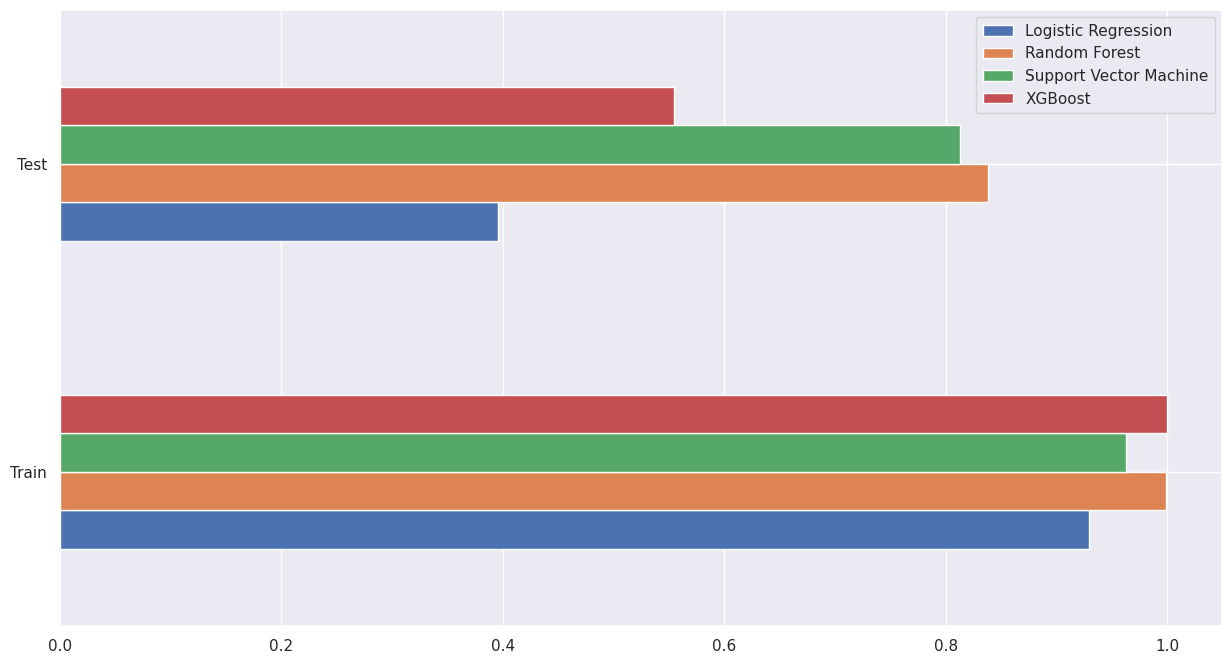

In [199]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))

In [209]:
jlib_file = "IBM Employee.pkl"
joblib.dump(rf_clf,jlib_file)

['IBM Employee.pkl']

In [204]:
x_test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,-0.541459,-0.446097,-0.156451,3.185393,-2.988426,2.593182,0.448867,-1.431959,-0.092523,-1.225894,1.480913,-0.306595,-2.007599,0.502663,1.621584,1.880025,-1.720656,0.359647,0.754128,1.977124,1.103737,0.542638,0.584369,-0.556141,0.920830,0.103621,-1.015001,0.482684,-0.580482,-0.485715,-2.110340,-2.017122,2.174563,-1.824786,-0.553905,0.138596,1.967519,0.650026,-0.259858,-0.687800,-0.162367,0.354858,0.139776,0.350348,-0.976311,-0.516823,-0.945790,-1.121505,0.591192,1.310793,-1.669725,0.541004,-0.223583,0.128201,0.500942,0.610621,-0.514902,-0.307186,-1.219628,-0.643051,0.535256,0.403639,0.270408,0.041782,-0.217428,2.921942,0.150424,0.386245,0.710309,-1.151015,1.196392,-0.936135,-1.237491,-0.509281,0.795618,-0.271749,1.261918,0.090082,0.110911,-0.143097,-0.384266,-1.325425,0.113898,-0.418977,0.998022,-0.078630,-0.089698,-0.404475,0.187159,0.225674
1,-0.618849,-0.197410,-0.457342,0.291662,3.482741,2.138723,1.914736,0.804624,-2.903671,0.714637,-1.180391,1.833671,-2.820039,1.111319,0.901571,-1.356740,-2.158203,-2.554130,-2.109646,-0.059493,-1.503148,2.948887,-0.674869,-2.313765,0.879359,1.239802,-0.068931,0.381695,-1.643452,0.465562,0.984095,-0.409369,2.901849,-1.662433,2.482116,-0.660000,0.070877,1.623665,1.425743,0.852737,1.117559,1.126832,-0.236218,0.157798,-2.280376,0.549554,-1.079693,1.205164,-1.097482,-1.864368,-0.732541,-1.288974,-1.883921,-0.938685,-0.505414,0.342612,2.218461,-0.703184,0.802607,-2.263452,-0.281171,-1.789079,-0.433447,-1.018417,1.786012,1.867486,0.386083,-0.571079,-1.769630,-0.132842,-1.076750,-0.126848,0.818252,1.556973,0.518724,0.048750,-0.174295,-2.334994,-1.449879,-0.091188,0.709204,0.025537,1.000090,0.771084,-0.702679,0.332837,1.712552,0.068318,0.521344,1.062564
2,-0.484963,1.848736,-0.153260,-0.102608,-0.117552,0.340867,1.891763,-1.547918,-0.886951,0.148727,1.950173,-1.394758,2.581916,-1.318639,0.384877,1.352800,-0.580149,1.351888,-3.878595,-3.140214,1.528294,-0.687936,-2.536964,-1.360415,0.628786,1.229645,-2.793223,0.035126,3.026205,-0.179257,-1.153127,-1.475621,0.836187,0.458676,-0.367963,0.791836,-0.882635,-1.167214,-2.689336,-1.006274,-0.207441,-1.950162,2.586145,-2.060035,1.698842,2.888691,0.045017,-0.674019,0.078118,-0.716303,-0.076972,-0.226590,0.977381,-2.930416,1.063060,-0.797318,0.519115,-1.287602,-1.813646,0.352172,0.624207,-3.509332,1.612209,0.512103,-0.404510,0.237153,1.968035,0.114433,1.075018,-0.676539,-0.114770,-0.105424,0.681536,2.293101,0.728954,-0.334464,-0.609576,-0.754689,-1.753508,-1.035119,0.082452,-1.913732,0.257343,1.375700,-0.084393,0.479248,-0.723757,-0.563067,0.605414,0.146837
3,0.841355,4.953222,-1.130325,-2.757520,-0.032992,3.370207,3.801315,2.042083,-1.358740,0.714945,-2.093014,-1.832448,-1.494538,-2.563771,-1.122104,-2.215549,2.154162,1.436897,-1.097156,-3.641349,0.138681,-2.172008,4.965851,0.743224,1.482672,3.142322,-1.808613,1.570889,1.925490,-0.863523,-0.950298,-1.719240,0.836657,-2.141644,-1.423113,-2.208898,-2.647335,-0.931484,1.417097,1.578155,-1.067627,0.066255,0.767774,-0.301176,-0.574418,1.492020,0.181632,-1.983441,-0.203985,0.362627,-1.013596,0.731723,1.136785,-1.481649,-1.140491,0.353139,-1.909035,0.013432,-0.467602,-0.085641,1.866698,0.280858,-0.149476,-1.416897,-0.314541,-0.190942,0.209033,0.998960,2.858938,-0.821613,0.056920,0.292318,0.004411,-0.406268,1.343953,3.143738,-0.958794,-0.351243,-0.190709,0.224708,0.133170,-0.831781,1.938505,0.952604,-1.256788,1.274838,-1.770302,-0.705413,-1.501424,-1.212658
4,-0.424066,-0.466373,-0.740677,1.582283,-2.434511,1.791997,-0.050139,0.154677,0.520373,-0.164452,-2.463251,-0.636194,2.858030,-2.295516,3.898910,-2.873309,-2.079516,1.516360,-1.663842,-0.448794,-1.457588,1.770876,-3.282418,2.823202,-2.248425,-0.359533,-1.717053,0.529481,0.476894,0.586881,-1.121513,0.9834

In [210]:
Saved_Model = joblib.load("IBM Employee.pkl")

In [211]:
test_pred = Saved_Model.predict(x_test_df)

In [212]:
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [214]:
test_pred=pd.DataFrame(test_pred)

In [215]:
test_pred.replace(to_replace=[1,0],value=["yes","no"],inplace=True)

In [216]:
test_pred

,0
0,no
1,no
2,no
3,no
4,no
...,...
422,no
423,no
424,no
425,no


In [217]:
submission=pd.DataFrame({"pred":test_pred[0]})

In [219]:
submission.to_csv('IBM employee attrition test answers.csv',index=False)